In [1]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [2]:
# Load the fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist

In [3]:
# load the traning and test split of the Fashion MNIST dataset
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


LABEL:9

Image Pixel Array:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  82 187  26   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0   0 179 240 237 255 240 139  83  64  43  60  54   0   1]
 [  0   0   0   0   0   0   0   0   0   1   0   0   1   0  58 239 222 234 238 246 252 254 255 248 255 187   0   0]
 [  0   0   0   0   0   0   0   0   0   0   2   3   

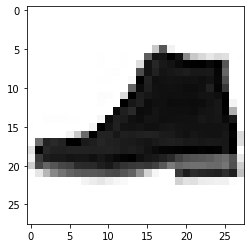

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# You can put between 0 to 59999 here
index = 42

# Set number of characters per row when printing
np.set_printoptions(linewidth=320)

# Print the label and image
print(f'LABEL:{training_labels[index]}')
print(f'\nImage Pixel Array:\n{training_images[index]}')

#Visualise the image
plt.imshow(training_images[index], cmap='Greys')

In [17]:
# Normalise the pixel values of the train and test images

training_images = training_images / 255.0
test_images = test_images / 255.0

In [19]:
# Build the classification model
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), 
                                    tf.keras.layers.Dense(128, activation=tf.nn.relu), 
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

In [20]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [21]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(training_images, training_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4944 - accuracy: 0.8264
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3746 - accuracy: 0.8630
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3382 - accuracy: 0.8766
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3136 - accuracy: 0.8849
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2962 - accuracy: 0.8901


In [22]:
# Evaluate the model on unseen data
model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 996us/step - loss: 0.3507 - accuracy: 0.8722


[0.3506826162338257, 0.8722000122070312]

## Exercise-1

In [23]:
classifications = model.predict(test_images)

print(classifications[0])

[1.46717537e-06 1.23753505e-08 9.87698172e-08 1.40652983e-08 5.13228031e-07 1.17005967e-02 7.81000210e-07 1.30209252e-02 7.74355431e-06 9.75267828e-01]


In [24]:
print(test_labels[0])


9


## Exercise-2

In [25]:
mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

11493376/11490434 [==============================] - 4s 0us/step
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1850
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0746
Epoch 3/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0493
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0339
Epoch 5/5
313/313 [==============================] - 1s 3ms/step - loss: 0.0689
[2.0889804e-08 1.9140871e-09 2.0391806e-08 7.1270347e-07 1.8249475e-13 2.1177225e-10 7.1199063e-13 9.9999917e-01 2.8278432e-10 1.2687084e-07]
7


In [27]:
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 7s 4ms/step - loss: 2.6793
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3344
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2810
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2678
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.2762
[0.0000000e+00 1.3543957e-24 9.5442636e-21 2.3954163e-17 6.2713377e-25 5.8124262e-23 0.0000000e+00 1.0000000e+00 1.2385366e-33 3.7183772e-27]
7
